In [2]:
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
from nltk import ngrams
import nltk
#nltk.download('words')
import io
import spacy
nlp = spacy.load('en')

import matplotlib.pyplot as plt
%matplotlib inline



### Tokenize the text using NLTK and Spacy

In [6]:
def get_words_list_season(season):
    token_list = []
    with io.open(r'Friends/filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        for line in f:
            zh, en = line.split('\b0\b1\b2---')
            doc = nlp(en)
            for token in doc:
                token_list.append(token)
    return token_list

def get_words_list_all():
    all_token_list = []
    season_list = [format(i, '02d') for i in range(1, 11)]     
    for season in season_list:
        token_list = get_words_list_season(season)
        all_token_list.extend(token_list)
    return all_token_list

# get_words_list_season('01')
all_token_list = get_words_list_all()

### sum up the numbers of vocabulary 

In [8]:

words_list = []
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

for token in all_token_list:
    if token.is_punct == False and token.is_space == False and token.is_digit == False:

        if token.text.lower() in english_vocab:
            words_list.append(token.text.lower())



print('numbers of vocabulary in subtitle: %s'%len(set(words_list)))
#print(sorted(set(words_list)))
    

numbers of vocabulary in subtitle: 8796

### word count

In [1]:
topn = 20
cnt = Counter(words_list)
most_common = cnt.most_common(topn)
top_words = [each[0] for each in most_common]
topn_nums = [each[1] for each in most_common]
df = pd.DataFrame(dict(top_words=top_words, topn_nums=topn_nums))

y_pos = range(len(top_words))
fig, ax = plt.subplots()
ax.barh(y_pos, topn_nums, color='green', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_words)
ax.invert_yaxis()
ax.set_xlabel('top n   n=%s' % topn)
ax.set_title("top %s link words in Friends"% topn, fontsize=14)

ax = sns.barplot(x="topn_nums", y="top_words", data=df)



NameError: name 'Counter' is not defined

In [17]:
def get_sents_list_season(season):
    sents_list = []
    with io.open(r'Friends/filtered_subtitles/S%s/S%s_en_all.txt' % (season, season), 'r', encoding='u8') as f:
        lines = f.read()
        lines = lines.replace('\n', ' ')
        
        doc = nlp(lines)
        for sent in doc.sents:
            #print('each sent', sent)
            if len(sent) > 0:
                sents_list.append(sent)
                
    sents_token_list = []
    for sent in sents_list:
        token_list = [token for token in sent]
        sents_token_list.append(token_list)
        
    return sents_token_list


def get_sents_list_all():
    sents_token_list_all = []
    season_list = [format(i, '02d') for i in range(1, 11)] 
    for season in season_list:
        sents_token_list_season = get_sents_list_season(season)
        sents_token_list_all.extend(sents_token_list_season)
        
    return sents_token_list_all

#sents_token_list_all = get_sents_list_all()
sents_token_list_season = get_sents_list_season('01')

### N-grams

In [19]:
sents_token_list = sents_token_list_season
sentences = [[token.text.lower() for token in sent if token.is_punct==False and token.is_space==False] for sent in sents_token_list]


def analyze_ngrams(n, sentences):
    cnt = Counter()
    for sent in sentences:
        if len(sent) >= n:
            cnt.update(" ".join(n) for n in ngrams(sent, n))
    
    return cnt

### drawing N-Gram plot by matplotlib
from the output result ,we can see that the most frequently phrase used in subtitle are "oh my god", "what are you doing", "I don't know" etc.

[("i do n't", 202), ("do n't know", 101), ("i ca n't", 76), ("i 'm not", 66), ('oh my god', 65), ("i 'm sorry", 64), ("you do n't", 61), ('gon na be', 56), ('what are you', 54), ("it 's just", 52), ('what do you', 49), ("i 'm gon", 47), ("'m gon na", 47), ('you know what', 44), ("'re gon na", 41), ("it 's not", 37), ("it 's a", 36), ("ca n't believe", 36), ("you 're gon", 31), ('no no no', 30)]

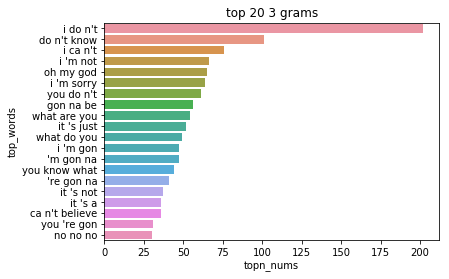

In [21]:

def plot_ngram(N, top_n):
    cnt = analyze_ngrams(N, sentences)
    topn_list = cnt.most_common(top_n)
    topn_words = [each[0] for each in topn_list]
    print(topn_list)
    topn_nums = [each[1] for each in topn_list]
    # print(topn_nums)
    
    df = pd.DataFrame(dict(top_words=topn_words, topn_nums=topn_nums))
    g = sns.barplot(x="topn_nums", y="top_words", data=df)
    g.set_title('top %s %s grams' % (top_n, N))
    
    
plot_ngram(3, 20)


[("i do n't know", 92), ("i 'm gon na", 47), ("i ca n't believe", 34), ("you 're gon na", 31), ('what are you doing', 23), ('are you gon na', 22), ("what 's going on", 19), ("do n't want to", 17), ('the one with the', 16), ("ca n't believe you", 15)]

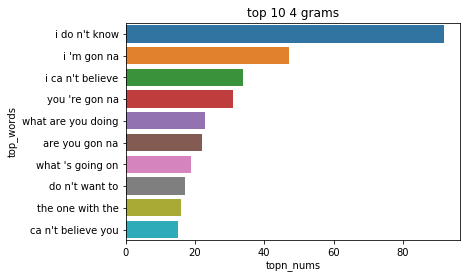

In [23]:
plot_ngram(4, 10)

[("i ca n't believe you", 15), ("i 'm gon na be", 12), ('what are you gon na', 10), ("i do n't know what", 10), ("i do n't want to", 9), ("i 'm gon na go", 9), ("you 're gon na be", 9), ('la la la la la', 9), ('what are you doing here', 9), ('are you gon na do', 6)]

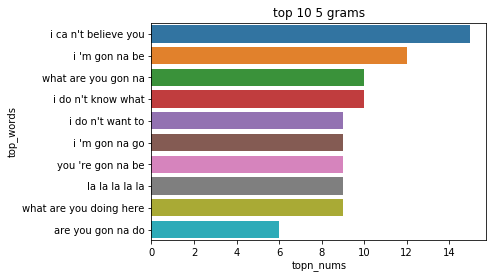

In [24]:
plot_ngram(5, 10)

### Sentence length.

In [22]:
import random


length_list = [len(s) for s in sentences]
df = pd.DataFrame(dict(length=length_list, sentence=sentences))


def define_len_range(x):
    len_range = ''
    if x <= 10:
        len_range = '[0, 10]'
    elif x > 10 and x <= 20:
        len_range = '(10,20]'
    elif x > 20 and x <= 30:
        len_range = '(20,30]'
    elif x > 30 and x <= 40:
        len_range = '(30,40]'
    elif x > 40 and x <= 50:
        len_range = '(40,50]'
    else:
        len_range = '[50,999)'
    return len_range

df['len_range'] = df.length.apply(define_len_range)
print(df['len_range'].value_counts())


long_sents = list(df[df.length >= 30].sentence)
print('below is some of the sentences that has more than 30 words')
for s in random.sample(long_sents, 2):
    print(' '.join(s))

[0, 10]    11727
(10,20]     1118
(20,30]       48
(30,40]        2
Name: len_range, dtype: int64

below is some of the sentences that has more than 30 words

i still got a week left in the program and according to the rules if i want to get the money i 'm not allowed to conduct any personal experiments

oh and uh well um you know by the time we finished with all the dirty talk it was kind of late and we were both exhausted so you cuddled